# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

state = pd.read_csv('states0.csv')
state.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [98]:
import glob

files = glob.glob("states*.csv")
df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

raw_data = pd.concat(df_list)

# Remove first column as the index are not necessary
us_census = raw_data.iloc[: , 1:]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [99]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [100]:
# TotalPop is an integer which is okay
# Income has a $ symbol thus it is an object
# Percentage for all the different races has a % symbol thus is read as
# an object data type as well 
# Gender Pop can be split to show the population for male and female 
# respectively

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [101]:
us_census.Income = us_census.Income.replace('[$]', '', regex=True)
us_census.Income = us_census.Income.replace('[,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [102]:
# Split GenderPop into Male and Female
split_genderpop = us_census.GenderPop.str.split('_', expand=True)

# Remove M and F after population
us_census['MalePop'] = split_genderpop[0].replace('\w$', '', regex=True)
us_census['FemalePop'] = split_genderpop[1].replace('\w$', '', regex=True)

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [103]:
us_census.MalePop = pd.to_numeric(us_census.MalePop)
us_census.FemalePop = pd.to_numeric(us_census.FemalePop)
us_census.dtypes
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

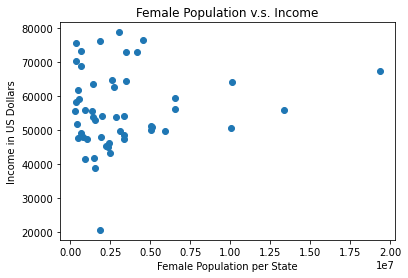

In [111]:
plt.scatter(us_census.FemalePop, us_census.Income)
plt.title('Female Population v.s. Income')
plt.ylabel('Income in US Dollars')
plt.xlabel('Female Population per State')
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [105]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     object 
 3   White      60 non-null     object 
 4   Black      60 non-null     object 
 5   Native     60 non-null     object 
 6   Asian      60 non-null     object 
 7   Pacific    55 non-null     object 
 8   Income     60 non-null     float64
 9   GenderPop  60 non-null     object 
 10  MalePop    60 non-null     int64  
 11  FemalePop  57 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ KB


In [106]:
us_census['FemalePop'] = us_census['FemalePop'].fillna(us_census.TotalPop - us_census.MalePop)
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     object 
 3   White      60 non-null     object 
 4   Black      60 non-null     object 
 5   Native     60 non-null     object 
 6   Asian      60 non-null     object 
 7   Pacific    55 non-null     object 
 8   Income     60 non-null     float64
 9   GenderPop  60 non-null     object 
 10  MalePop    60 non-null     int64  
 11  FemalePop  60 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ KB


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [108]:
us_census.duplicated(subset=['State']).value_counts()

False    51
True      9
dtype: int64

11. Drop those duplicates using the `.drop_duplicates()` function.

In [109]:
us_census = us_census.drop_duplicates()
len(us_census)

51

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

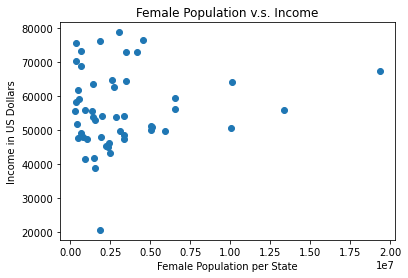

In [112]:
plt.scatter(us_census.FemalePop, us_census.Income)
plt.title('Female Population v.s. Income')
plt.ylabel('Income in US Dollars')
plt.xlabel('Female Population per State')
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [117]:
us_census.columns
# Hispanic, White, Black, Native, Asian, Pacific

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'MalePop', 'FemalePop'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [133]:
us_census.info()
# There are null values in Pacific. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     float64
 3   White      51 non-null     float64
 4   Black      51 non-null     float64
 5   Native     51 non-null     float64
 6   Asian      51 non-null     float64
 7   Pacific    47 non-null     float64
 8   Income     51 non-null     float64
 9   GenderPop  51 non-null     object 
 10  MalePop    51 non-null     int64  
 11  FemalePop  51 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.2+ KB


In [136]:
us_census['Pacific'] = us_census['Pacific'].fillna(100-us_census['Hispanic']-us_census['White']-us_census['Black']-us_census['Native']-us_census['Asian'])

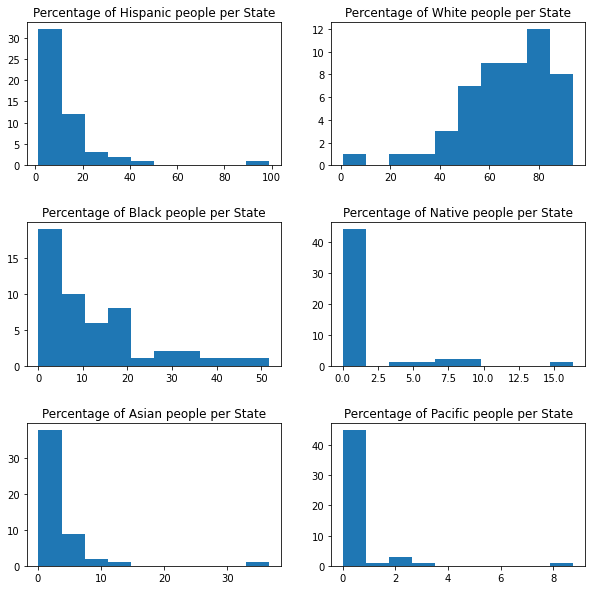

In [137]:
i = 0
plt.figure(figsize = (10,10))
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    i += 1
    us_census[race] = us_census[race].replace('[%]', '', regex=True)
    us_census[race] = pd.to_numeric(us_census[race])
    plt.subplot(3, 2, i)
    plt.hist(us_census[race])
    plt.title('Percentage of ' + race + ' people per State')

plt.subplots_adjust(hspace=0.4)